In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df=pd.read_excel("Ex2.xlsx", sheet_name="Sheet4")
df.head()

,Movie,Production cost,Revenue,Profit,Employee count,Score,Factor
0,1,1060,1580,520,60,4,26.333333
1,2,2000,2350,350,150,3,15.666667
2,3,1260,4300,3040,80,5,53.750000
3,4,1700,2470,770,110,4,22.454545
4,5,1780,2020,240,190,3,10.631579


Average Compensation Satisfaction Score: 2.5
Correlation between Score and Profit: 0.6714086214674913


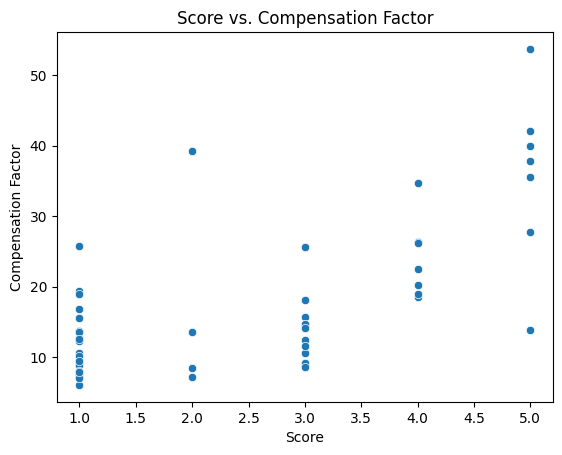

In [3]:
average_compensation_score = df['Score'].mean()
print(f'Average Compensation Satisfaction Score: {average_compensation_score}')

correlation = df['Score'].corr(df['Factor'])
print(f'Correlation between Score and Profit: {correlation}')

sns.scatterplot(data=df, x='Score', y='Factor')
plt.title('Score vs. Compensation Factor')
plt.xlabel('Score')
plt.ylabel('Compensation Factor')
plt.show()

<Axes: >

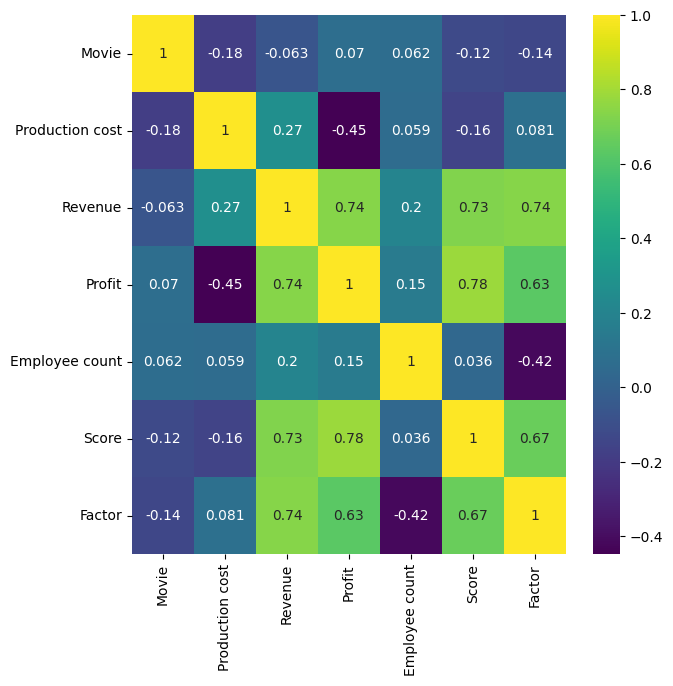

In [4]:
correlation=df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='viridis')

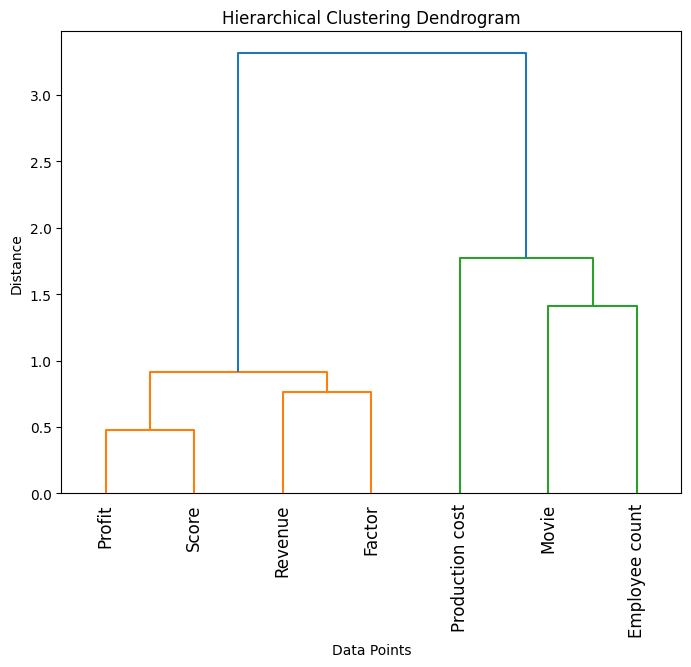

In [5]:
linkage_matrix = linkage(correlation, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=correlation.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.show()

Text(0, 0.5, 'Relationship Between colleagues')

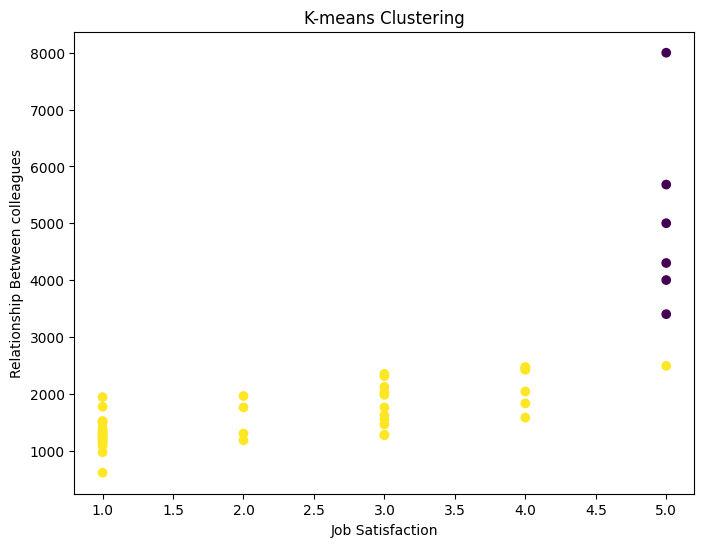

In [6]:
scaler = StandardScaler()
scaled= scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)
k_opt=2
model = KMeans(n_clusters=k_opt,random_state =42,n_init=20)
model.fit(df)

df['labels'] = model.labels_
cluster_centers = model.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(df['Score'], df['Revenue'] , c=df['labels'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Job Satisfaction')
plt.ylabel('Relationship Between colleagues')